### <center>Lending Club Case Study </center>
#### This program is going to analyze the credit risk based on the given data and suggest the outcome
###### Approach of this case study
  * Load the loan data 
  * Parse the data as needed
  * Clean the data by taking care of handling missing values,outliers
  * Drop the unwanted columns for easy analysis
  * Manipulate the datas needed like string to number, string to date
  * Format as needed to easy process and comparision
  * Perform analysis using Univariate and Bivariate methods
  * Represent the findings in visauls 
  * Summarize the conclusion

#### Section 1 - Data Loading  
* load the file with proper encoding 
* List the columns and make and count of the rows

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

pd.set_option('display.max_columns', None)

#Loading the file into dataframe
orgLoanLists=pd.read_csv('loan.csv',engine='python')
print('Total Size (Row,Column)',orgLoanLists.shape)  ##39717

# Dropping the columns which does not have values
loanLists = orgLoanLists.dropna(axis = 1, how ='all') 

print('Total Size after removing NA columns (Row,Column)',loanLists.shape) 
loanLists.drop(columns=['policy_code', 'id','desc','url'],axis=1,inplace=True)
print('Total Size after removing irrelevant columns (Row,Column)',loanLists.shape) 
# Find the unique value columns and drop them
uniqueValCols=[]
for col in loanLists.columns:
    if (len(loanLists[col].unique())) == 1:
        uniqueValCols.append(col)
loanLists.drop(columns=uniqueValCols,axis=1,inplace=True)
print('Total Size after removing unique value cols (Row,Column)',loanLists.shape)

# Based on the meta data analysis mths_since_last_record and next_pymnt_d columns not needed
loanLists.drop(columns=['mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)
print('Total Size after removing irrelevant value cols (Row,Column)',loanLists.shape)
loanLists.head(5)

Total Size (Row,Column) (39717, 111)
Total Size after removing NA columns (Row,Column) (39717, 57)


C:\apps\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Total Size after removing irrelevant columns (Row,Column) (39717, 53)
Total Size after removing unique value cols (Row,Column) (39717, 48)
Total Size after removing irrelevant value cols (Row,Column) (39717, 46)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


#### Section 2 - Look at the meta data and analyze them further
* Load the columns and filter the desired columns based on the modified loans data set
* Find out data type of each column and merge with data dictionary
* Analyze the column headers to find out the irrelevant details 

In [65]:
# Analyze the data dictionary to identify the coulmn types
metadata = pd.read_excel('Data_Dictionary.xlsx') # Loading in the data dictionary
print('Data dictionary size (row,columns)',metadata.shape[0])
metadata=metadata[metadata.LoanStatNew.isin(loanLists.columns)]
print('Data dictionary size after trimming (row,columns)',metadata.shape[0])
metadata = metadata.rename(columns={'LoanStatNew': 'column', 'Description': 'description'})

# Find the datatype and merge
loanLists_dtypes = pd.DataFrame(loanLists.dtypes,columns=['dtypes'])
loanLists_dtypes = loanLists_dtypes.reset_index()
loanLists_dtypes['column'] = loanLists_dtypes['index']
loanLists_dtypes = loanLists_dtypes[['column','dtypes']]
loanLists_dtypes['first value'] = loanLists.loc[0].values
ddwithTypeList = loanLists_dtypes.merge(metadata, on='column',how='left')
ddwithTypeList.head(46)

Data dictionary size (row,columns) 117
Data dictionary size after trimming (row,columns) 46


,column,dtypes,first value,description
0,member_id,int64,1296599,A unique LC assigned Id for the borrower member.
1,loan_amnt,int64,5000,The listed amount of the loan applied for by t...
2,funded_amnt,int64,5000,The total amount committed to that loan at tha...
3,funded_amnt_inv,float64,4975,The total amount committed by investors for th...
4,term,object,36 months,The number of payments on the loan. Values are...
5,int_rate,object,10.65%,Interest Rate on the loan
6,installment,float64,162.87,The monthly payment owed by the borrower if th...
7,grade,object,B,LC assigned loan grade
8,sub_grade,object,B2,LC assigned loan subgrade
9,emp_title,object,NaN,The job title supplied by the Borrower when ap...


#### Section  3 - Further analysis to drop the columns not needed for analysis based on the data dictinary details
* Find out columns added after the loan approval and drop them (future columns)
* Columns with incomplete or hidden
* Auto generated columns not linked with borrower directly
* redundant information fields


In [66]:
#### member_id - System generated value 
#### Lending club assigns interest rate based on grade drop sub grade and interest rate (refer: https://www.lendingclub.com/investing/investor-education/interest-rates-and-fees)
#### Drop zip_code: It is not given completely and instead state can be used 
#### Funded columns are future columns derived after approval and hence not needed for analysis
#### Overhead columns like emp_title
#### Remove columns with more than 1% empty values

missingValues=round(100*(loanLists.isnull().sum()/len(loanLists.index)),2) ## What % values is null in each column
print('Missing Values %:',missingValues)
futureDerivedColumns=['funded_amnt','funded_amnt_inv','issue_d','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
autogeneratedcols=['member_id']
redundantcols=['int_rate','sub_grade','emp_title','zip_code']
novalueCols=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
#Drop columns which has more than 1% empty values
toomanyNAValCols=['pub_rec_bankruptcies','mths_since_last_delinq']
loanLists.drop(columns=futureDerivedColumns,axis=1,inplace=True)
loanLists.drop(columns=autogeneratedcols,axis=1,inplace=True)
loanLists.drop(columns=redundantcols,axis=1,inplace=True)
loanLists.drop(columns=novalueCols,axis=1,inplace=True)
loanLists.drop(columns=toomanyNAValCols,axis=1,inplace=True)
print('Total Size after removing based analysis (Row,Column)',loanLists.shape)
loanLists.head(5)

Missing Values %: member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths                 0.00
mths_since_last_delinq        64.66
open_acc                       0.00
pub_rec                        0.00
revol_bal 

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,last_credit_pull_d
0,5000,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5000.00,May-16
1,2500,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,456.46,Sep-13
2,2400,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,2400.00,May-16
3,10000,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,10000.00,Apr-16
4,3000,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,2475.94,May-16


#### Section  4 - Manipulate and format the data
* Find out columns which needs manipulation
* Filter the desired data from the loans data (i.e fully paid and not paid)
* replace of the missing numbers 

In [67]:
## Risk prediction has to be done for the fully paid loans and defaulted loans. So the data set need to
## be filtered only for fully paid and defaulted categories
# Further analysis on the rest of the coumns

#print(loanLists["loan_status"].value_counts())
print('Total rows before filtering -',loanLists.shape)
## Filter only fully paid and chrged off loans since that is relevant to the analysis
desiredLoans=loanLists[(loanLists.loan_status=='Charged Off') | (loanLists.loan_status=='Fully Paid')]
print('Total rows after filtering -',desiredLoans.shape)
#print(desiredLoans["verification_status"].value_counts())
#desiredLoans=desiredLoans.replace(to_replace = np.nan, value =0)
desiredLoans["verification_status"]=loanLists["verification_status"].replace(to_replace ="Source Verified", value ="Verified")
#mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
#desiredLoans = desiredLoans.replace(mapping_dictionary)
desiredLoans.head(5)

## Further analyze on the columns to find the categorical values
## title and purpose looks similar and do some more research on these 
## Based on the coulmn type, revol_util and terms looks like a numbers (int and float)
print("Data types and their frequency in desired set \n{}".format(desiredLoans.dtypes.value_counts()))
object_columns_df = desiredLoans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])
print(desiredLoans["term"].value_counts())
desiredLoans['revol_util'] = desiredLoans['revol_util'].str.rstrip('%').astype('float')
desiredLoans['term'] = desiredLoans['term'].str.rstrip(' months')
object_columns_df1 = desiredLoans.select_dtypes(include=['object'])
print(object_columns_df1.iloc[0])

print(desiredLoans.columns)
print(desiredLoans["purpose"].value_counts())
print(desiredLoans["title"].value_counts())

## Since title is derived column of purpose, we could drop title
desiredLoans.drop(columns=['title'],axis=1,inplace=True)

## Derive the column
desiredLoans['loan_income_ratio']= desiredLoans['loan_amnt']/desiredLoans['annual_inc']
print(desiredLoans.shape)

Total rows before filtering - (39717, 23)
Total rows after filtering - (38577, 23)
Data types and their frequency in desired set 
object     12
int64       7
float64     4
dtype: int64
term                     36 months
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line            Jan-85
revol_util                  83.70%
last_credit_pull_d          May-16
Name: 0, dtype: object
 36 months    29096
 60 months     9481
Name: term, dtype: int64


C:\apps\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\apps\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\apps\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

term                            36
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line            Jan-85
last_credit_pull_d          May-16
Name: 0, dtype: object
Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_rec_prncp',
       'last_credit_pull_d'],
      dtype='object')
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedd

C:\apps\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
desiredLoans.head(15)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,last_credit_pull_d,loan_income_ratio
0,5000,36,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5000.00,May-16,0.208333
1,2500,60,59.83,C,< 1 year,RENT,30000.0,Verified,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,456.46,Sep-13,0.083333
2,2400,36,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,2400.00,May-16,0.195886
3,10000,36,339.31,C,10+ years,RENT,49200.0,Verified,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,10000.00,Apr-16,0.203252
5,5000,36,156.46,A,3 years,RENT,36000.0,Verified,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5000.00,Jan-16,0.138889
6,7000,60,170.08,C,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.6,11,6985.61,May-16,0.148923
7,3000,36,109.43,E,9 years,RENT,48000.0,Verified,Fully Paid,car,CA,5.35,0,Jan-07,2,4,0,8221,87.5,4,3000.00,Dec-14,0.062500
8,5600,60,152.39,F,4 years,OWN,40000.0,Verified,Charged Off,small_business,CA,5.55,0,Apr-04,2,11,0,5210,32.6,13,162.02,Aug-12,0.140000
9,5375,60,121.45,B,< 1 year,RENT,15000.0,Verified,Charged Off,other,TX,18.08,0,Sep-04,0,2,0,9279,36.5,3,673.48,Mar-13,0.358333
10,6500,60,153.45,C,5 years,OWN,72000.0,Not Verified,Fully Paid,debt_consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.6,23,6500.00,Dec-15,0.090278


#### Section  5 - Depict the current status 
* Plot the charts to show how much of the loans are charged off vs fully paid which gives better understanding
* Frequency graph is shown to provide an indication of the various loan status counts 
* % pie chart will explains how much loan is defaulted

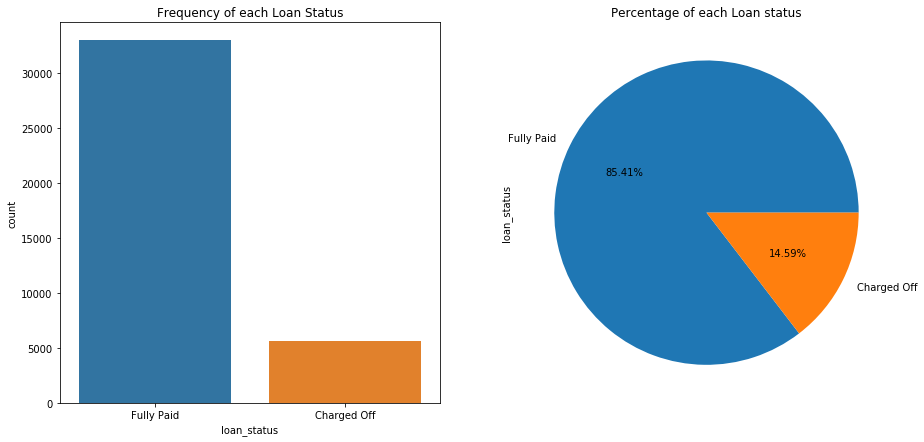

In [68]:
totalAmountFunded=int(desiredLoans['loan_amnt'].sum())
totalAmountReceived=int(desiredLoans['total_rec_prncp'].sum())
lossIncurred=totalAmountFunded-totalAmountReceived
AmountDetails = ['Amount Received', 'Loss to the company'] 
 
fig, axs = plt.subplots(1,2,figsize=(15,7))
sns.countplot(x='loan_status',data=desiredLoans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
desiredLoans.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [71]:
# Creating a dataframe of all the people who are charged off
desiredLoans_chargedoff = desiredLoans.loc[(desiredLoans.loan_status =='Charged Off')]
desiredLoans_chargedoff

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,last_credit_pull_d,loan_income_ratio
1,2500,60,59.83,C,< 1 year,RENT,30000.0,Verified,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,456.46,Sep-13,0.083333
8,5600,60,152.39,F,4 years,OWN,40000.0,Verified,Charged Off,small_business,CA,5.55,0,Apr-04,2,11,0,5210,32.6,13,162.02,Aug-12,0.140000
9,5375,60,121.45,B,< 1 year,RENT,15000.0,Verified,Charged Off,other,TX,18.08,0,Sep-04,0,2,0,9279,36.5,3,673.48,Mar-13,0.358333
12,9000,36,305.38,C,< 1 year,RENT,30000.0,Verified,Charged Off,debt_consolidation,VA,10.08,0,Apr-04,1,4,0,10452,91.7,9,1256.14,Nov-12,0.300000
14,10000,36,325.74,B,3 years,RENT,100000.0,Verified,Charged Off,other,CA,7.06,0,May-91,2,14,0,11997,55.5,29,5433.47,Mar-14,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,2500,36,84.00,D,< 1 year,MORTGAGE,32000.0,Not Verified,Charged Off,home_improvement,NE,20.00,0,Jul-92,1,11,0,3408,35.1,32,1706.01,May-16,0.078125
39668,2500,36,80.26,B,< 1 year,MORTGAGE,75000.0,Not Verified,Charged Off,home_improvement,NE,20.00,0,Feb-94,3,9,0,269,3.8,35,1730.83,May-16,0.033333
39669,6500,36,225.37,F,9 years,MORTGAGE,213000.0,Not Verified,Charged Off,small_business,GA,6.45,0,Jul-90,0,11,0,56411,75.3,28,2886.21,May-16,0.030516
39678,1000,36,32.55,C,2 years,MORTGAGE,33990.0,Not Verified,Charged Off,wedding,VA,14.47,0,Jul-04,1,9,0,4485,36.9,11,544.02,Oct-09,0.029420


#### Section  6 - Univariate Analysis 
* Figure out the loand details based on the purpose of the loan 
* Explain using home ownership count chart
* Boxplot is used to indicate that median of annual income of most of the people is 80K and there are outliers in the income data.

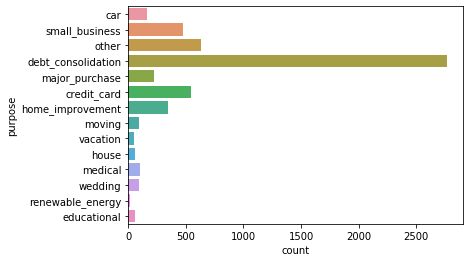

In [69]:
#Graph of count of people who have taken loan for various purpose.
# The graph indicates that most of the people have taken loan for their dept consolidation.
sns.countplot(y='purpose',data=desiredLoans_chargedoff)
plt.show()

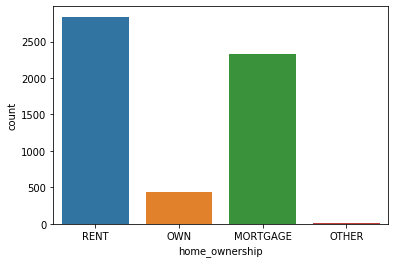

In [70]:
# Histogram of home ownerships
# It is clear from the following graph thar rented people are atmost chargedoff.
sns.countplot(x='home_ownership',data=desiredLoans_chargedoff)
plt.show()

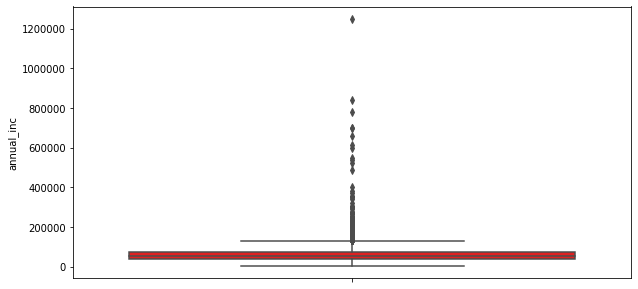

In [72]:
#Boxplot of annual income of the people.
#The following figure indicates that median of annual income of most of the people is 80K
#and there are outliers in the income data.
plt.figure(figsize=(10,5))
sns.boxplot(y="annual_inc", data=desiredLoans_chargedoff, color='red')

#### Section  6.1 - Univariate Analysis  - Segmented
* Based on length of experience
* Use the loan grade as indicator

In [73]:
## Univariate Segmented Analysis
#Number of charged off people having different length of work experience.
# It is clear from bottom that people having more than 10 years have applied for maximum average loan amount
loan_count = desiredLoans_chargedoff.pivot_table( values = ['loan_amnt'], index = ['emp_length'], aggfunc = 'mean').sort_values(('loan_amnt'),ascending = False)
loan_count

,loan_amnt
emp_length,
10+ years,14594.459053
9 years,13136.075949
8 years,13050.862069
7 years,12894.961977
6 years,12563.599349
5 years,12044.432314
4 years,11522.402597
3 years,11405.495495
2 years,10738.095238


In [74]:
#It is clear from the below table that people from grade G have more average revolving credit among all grades.
#desiredLoans_chargedoff_cat_subcat = desiredLoans_chargedoff.groupby(['grade', 'sub_grade'])
desiredLoans_chargedoff_cat_subcat = desiredLoans_chargedoff.groupby(['grade'])
desiredLoans_chargedoff_cat_subcat['revol_bal'].mean()

grade
A    11762.662791
B    12716.248421
C    13356.634001
D    13130.446333
E    15421.629371
F    17082.166144
G    16791.792079
Name: revol_bal, dtype: float64

<Figure size 1800x360 with 0 Axes>

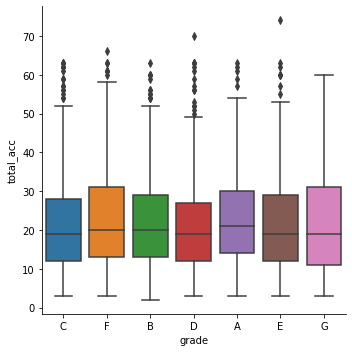

In [75]:
# Distribution graph of grades and total account.
# The graph indicates that median  of total accounts of all grades is almost same.
plt.figure(figsize=(25,5))

sns.catplot(
    data=desiredLoans_chargedoff,
    x='grade',
    y='total_acc',
    kind='box')

#### Section  7 - Bivariate Analysis 
* Purpose and loan amount is used to figure out the need of the loan
* Heat map explains the correlation between the purpose and other parameters


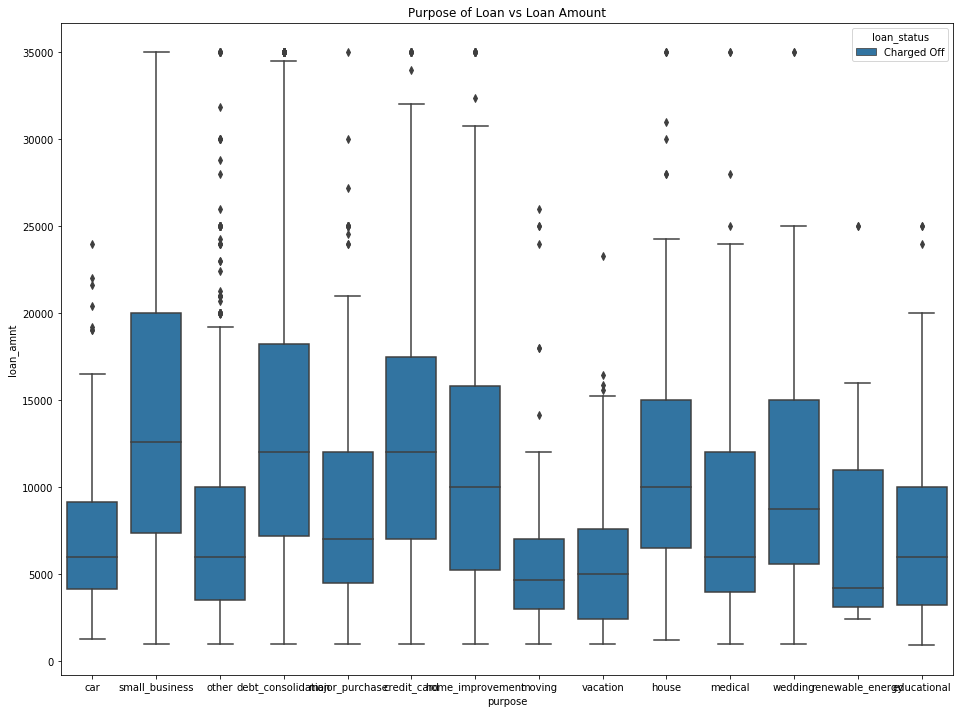

In [76]:
## Bivariate 
plt.figure(figsize=(16,12))
sns.boxplot(data =desiredLoans_chargedoff, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

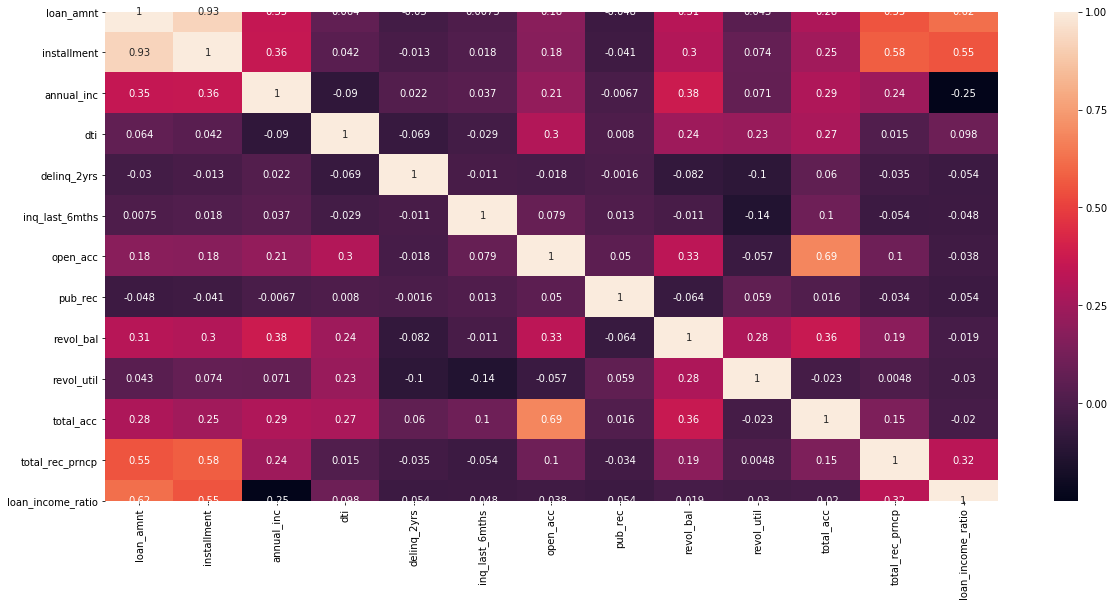

In [77]:
# Find corr to get the relationship between the variables
desiredLoans_correlation = desiredLoans_chargedoff.corr()
desiredLoans_correlation

f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(desiredLoans_correlation, 
            xticklabels=desiredLoans_correlation.columns.values,
            yticklabels=desiredLoans_correlation.columns.values,annot= True)
plt.show()

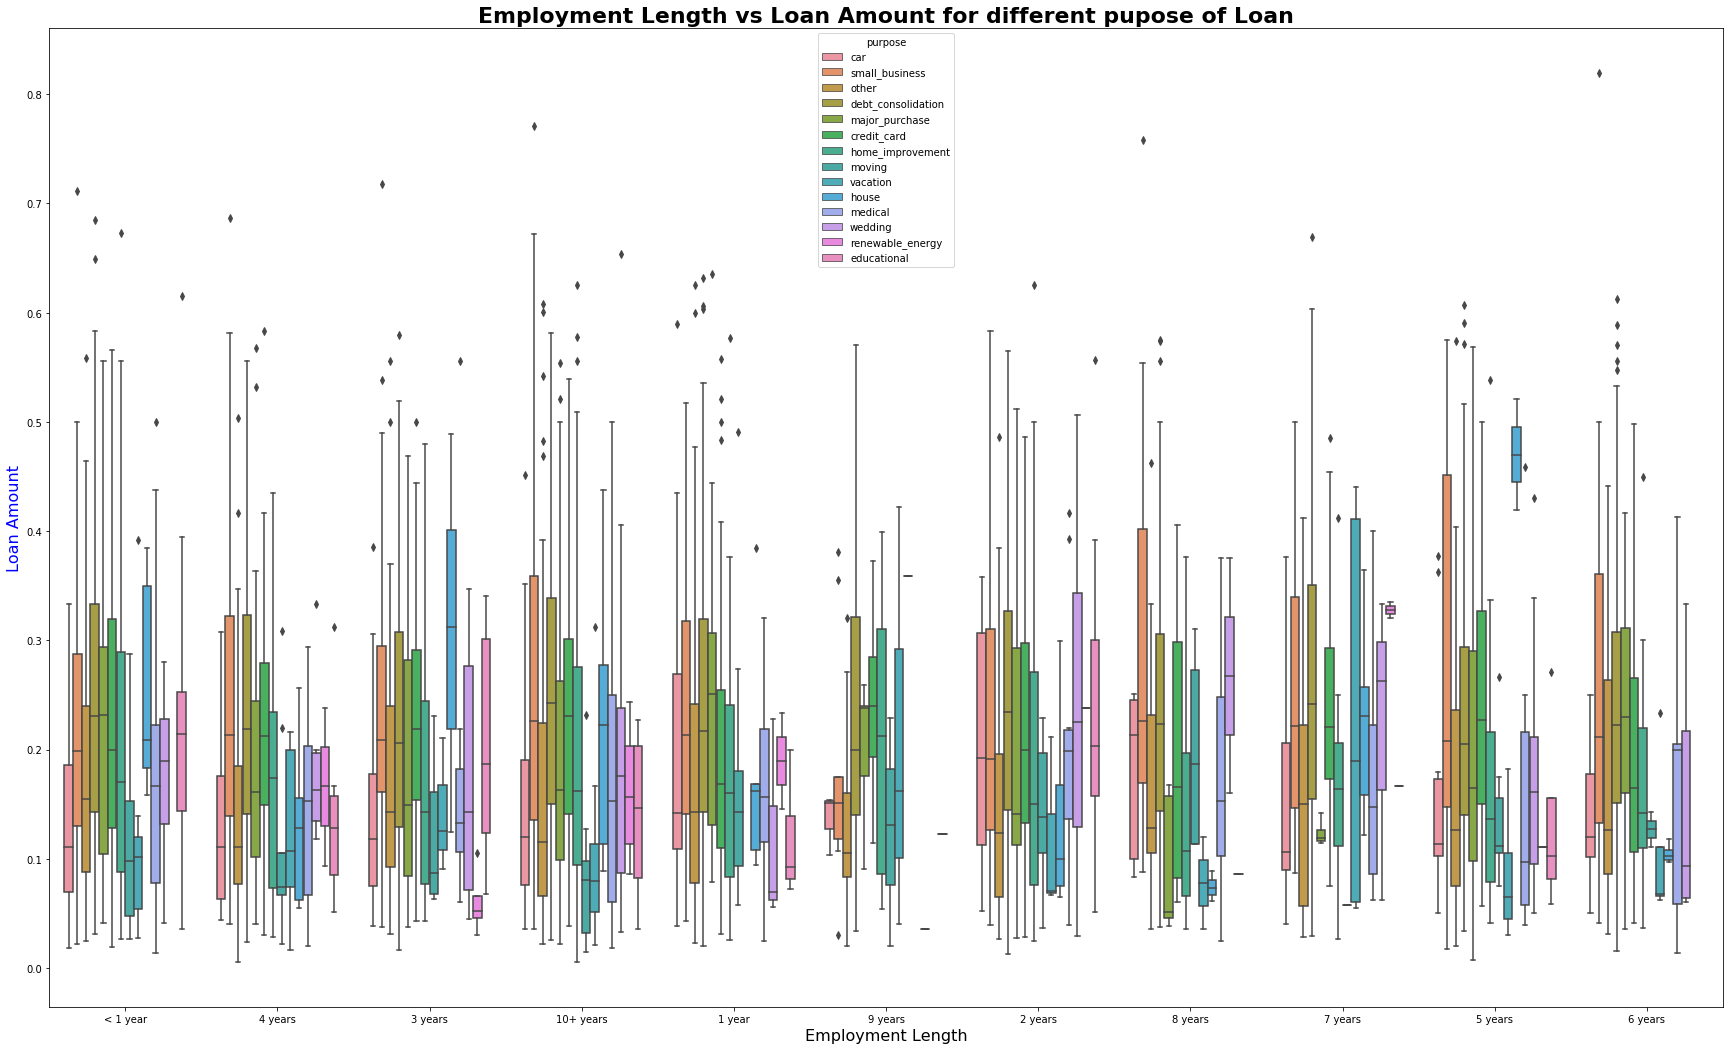

In [78]:
loanstatus=desiredLoans_chargedoff.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=desiredLoans_chargedoff.loc[desiredLoans['loan_status']=='Charged Off']

ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_income_ratio',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

loan_status  Charged Off  Fully Paid   All  Probability_Charged Off
addr_state                                                         
OK                    40         247   287                     0.14
OR                    71         364   435                     0.16
PA                   180        1288  1468                     0.12
RI                    25         169   194                     0.13
SC                    66         393   459                     0.14
SD                    12          50    62                     0.19
TN                     2          15    17                     0.12
TX                   316        2343  2659                     0.12
UT                    40         212   252                     0.16
VA                   177        1192  1369                     0.13
VT                     6          47    53                     0.11
WA                   127         691   818                     0.16
WI                    63         377   440      

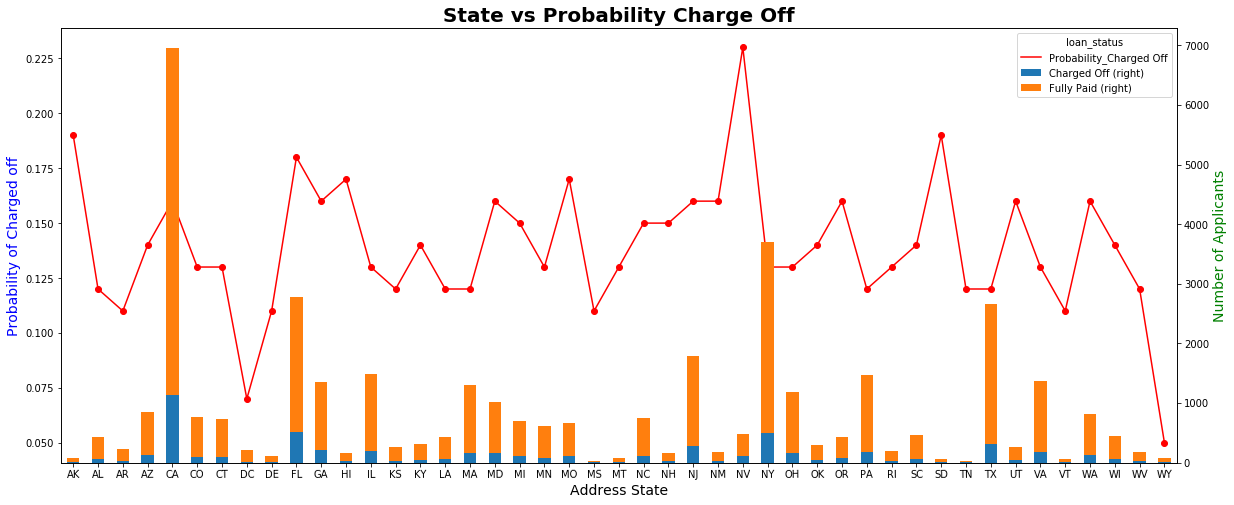

In [79]:
## Statewise calculation using crosstab conversion
state_loanstatus=desiredLoans[['addr_state','loan_status']]
filter_states = state_loanstatus.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]
filtered_state_loans = state_loanstatus.drop(labels = state_loanstatus[state_loanstatus.addr_state.isin(filter_states.index)].index)
crosstabLoans = pd.crosstab(filtered_state_loans['addr_state'], filtered_state_loans['loan_status'],margins=True)
crosstabLoans['Probability_Charged Off'] = round((crosstabLoans['Charged Off']/crosstabLoans['All']),2)
crosstabLoans = crosstabLoans[0:-1]
print(crosstabLoans.tail(15))

linePlot = crosstabLoans[['Probability_Charged Off']]      
barPlot =  crosstabLoans.iloc[:,0:2]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'r')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('State vs Probability Charge Off',fontsize=20,weight="bold")
ax.set_xlabel('Address State',fontsize=14)
ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
plt.show()
#There are multiple States/Provinces with high probability of charge,highest being 'NV' more than 0.2 

loan_status         Charged Off  Fully Paid    All  Probability_Charged Off
purpose                                                                    
car                         160        1339   1499                     0.11
credit_card                 542        4485   5027                     0.11
debt_consolidation         2767       15288  18055                     0.15
educational                  56         269    325                     0.17
home_improvement            347        2528   2875                     0.12
house                        59         308    367                     0.16
major_purchase              222        1928   2150                     0.10
medical                     106         575    681                     0.16
moving                       92         484    576                     0.16
other                       633        3232   3865                     0.16
renewable_energy             19          83    102                     0.19
small_busine

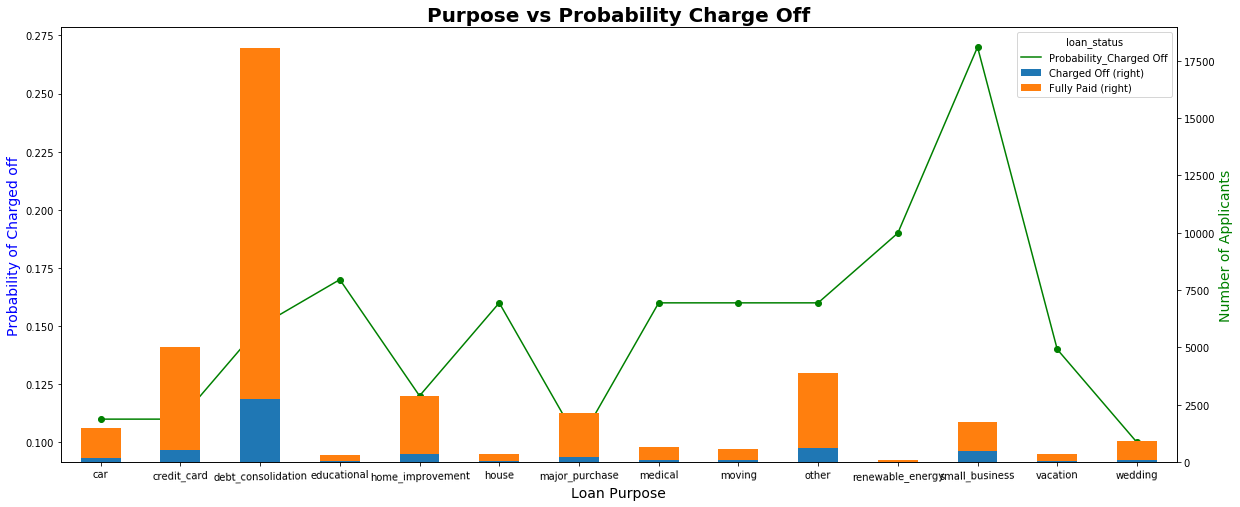

In [80]:
## Purpose wise calculation using crosstab conversion
purpose_loanstatus=desiredLoans[['purpose','loan_status']]
filter_purpose = purpose_loanstatus.purpose.value_counts()
filter_purpose = filter_purpose[(filter_purpose < 10)]
crosstabPurLoans = pd.crosstab(purpose_loanstatus['purpose'], purpose_loanstatus['loan_status'],margins=True)
crosstabPurLoans['Probability_Charged Off'] = round((crosstabPurLoans['Charged Off']/crosstabPurLoans['All']),2)
crosstabPurLoans = crosstabPurLoans[0:-1]
print(crosstabPurLoans.tail(15))

linePlot = crosstabPurLoans[['Probability_Charged Off']]      
barPlot =  crosstabPurLoans.iloc[:,0:2]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'g')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Purpose vs Probability Charge Off',fontsize=20,weight="bold")
ax.set_xlabel('Loan Purpose',fontsize=14)
ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
plt.show()
##Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off > 0.25.
##So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'

loan_status  Charged Off  Fully Paid    All  Probability_Charged Off
grade                                                               
A                    602        9443  10045                     0.06
B                   1425       10250  11675                     0.12
C                   1347        6487   7834                     0.17
D                   1118        3967   5085                     0.22
E                    715        1948   2663                     0.27
F                    319         657    976                     0.33
G                    101         198    299                     0.34


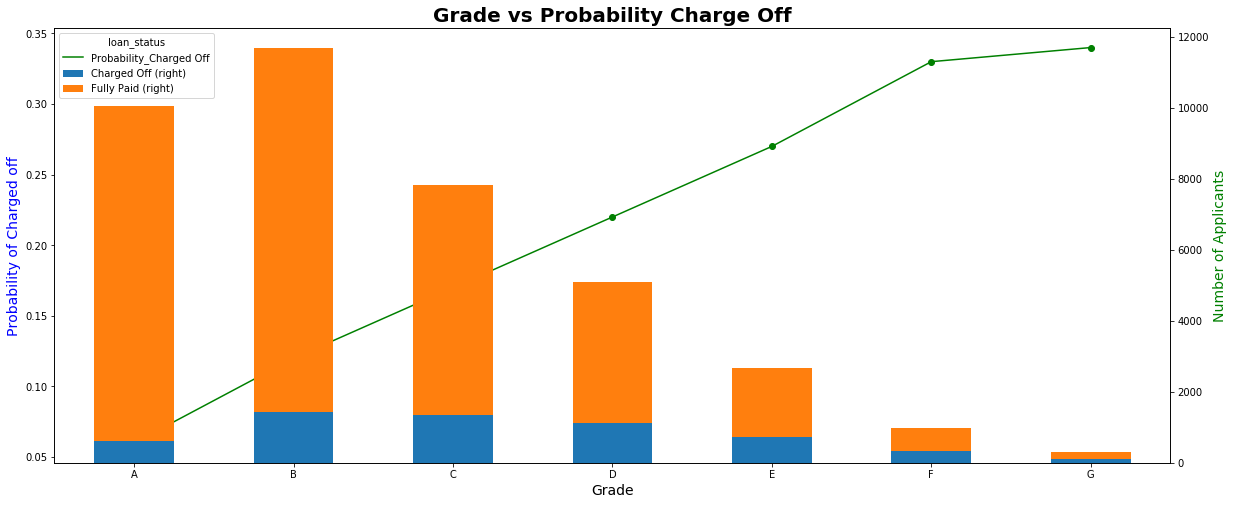

In [81]:
## Grade wise calculation using crosstab conversion
grade_loanstatus=desiredLoans[['grade','loan_status']]
#filter_grade = grade_loanstatus.grade.value_counts()
#grade_loanstatus = grade_loanstatus[(filter_grade < 10)]
crosstabGradeLoans = pd.crosstab(grade_loanstatus['grade'], grade_loanstatus['loan_status'],margins=True)
crosstabGradeLoans['Probability_Charged Off'] = round((crosstabGradeLoans['Charged Off']/crosstabGradeLoans['All']),2)
crosstabGradeLoans = crosstabGradeLoans[0:-1]
print(crosstabGradeLoans.tail(15))

linePlot = crosstabGradeLoans[['Probability_Charged Off']]      
barPlot =  crosstabGradeLoans.iloc[:,0:2]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'g')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Grade vs Probability Charge Off',fontsize=20,weight="bold")
ax.set_xlabel('Grade',fontsize=14)
ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
plt.show()
##As we move from Grade A to G onwrads, probability that person will charged off is increasing

loan_status  Charged Off  Fully Paid  All  Probability_Charged Off
revol_util                                                        
98.5                   6          19   25                    0.240
98.6                  10          24   34                    0.294
98.7                  10          15   25                    0.400
98.8                   5          31   36                    0.139
98.9                   4          13   17                    0.235
99.0                  11          21   32                    0.344
99.1                   3          25   28                    0.107
99.2                   4          13   17                    0.235
99.3                  11          18   29                    0.379
99.4                   5          16   21                    0.238
99.5                   6          17   23                    0.261
99.6                   4          18   22                    0.182
99.7                   1          29   30                    0

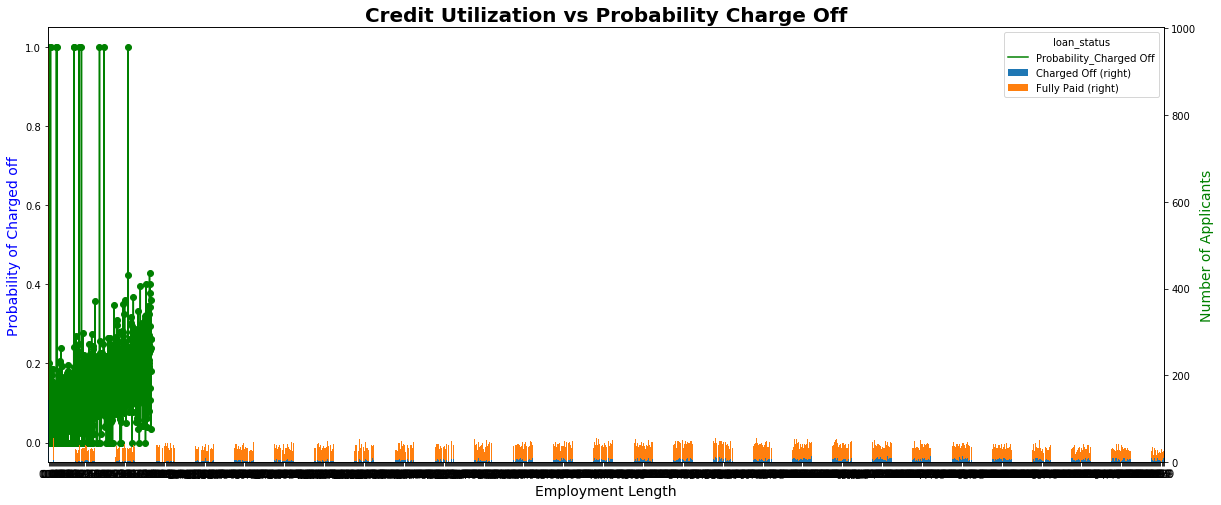

In [19]:
## Employment based calculation using crosstab conversion
revutil_loanstatus=desiredLoans[['revol_util','loan_status']]
filter_inc = revutil_loanstatus.revol_util.value_counts()
#emp_loanstatus = emp_loanstatus[(filter_inc < 10)]
crosstabRULoans = pd.crosstab(revutil_loanstatus['revol_util'], revutil_loanstatus['loan_status'],margins=True)
crosstabRULoans['Probability_Charged Off'] = round((crosstabRULoans['Charged Off']/crosstabRULoans['All']),3)
crosstabRULoans = crosstabRULoans[0:-1]
print(crosstabRULoans.tail(15))
print(crosstabRULoans.columns)
linePlot = crosstabRULoans[['Probability_Charged Off']]      
barPlot =  crosstabRULoans.iloc[:,0:2]
ax = linePlot.plot(figsize=(20,8), marker='o',color = 'g')
ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=True)
ax.set_title('Credit Utilization vs Probability Charge Off',fontsize=20,weight="bold")
ax.set_xlabel('Employment Length',fontsize=14)
ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
plt.show()
##When they have used most of their credit balances, it is quiet evident that the possibility of charge is high 


###### Note : Lending club case study was done by my group (Nataraj Eswaran, Sanjeev Kumar)